**Import the Libraries**

In [185]:
 #Import the Libraries.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


from contextlib import contextmanager




**Getting the stock data form yahoo finance**

In [178]:
import yfinance as yf


# Download the data
df = yf.download('EXIDEIND.NS', start='2023-01-01', end='2024-01-31')

# Save to CSV
df.to_csv('EXIDEIND_data.csv')




[*********************100%%**********************]  1 of 1 completed


In [179]:
#reading the file from drive
df=pd.read_csv('/content/EXIDEIND_data.csv')

# Print the first few rows of the DataFrame
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,181.000000,181.750000,179.649994,181.399994,179.946472,1333139
1,2023-01-03,182.000000,183.000000,179.500000,180.899994,179.450470,1729484
2,2023-01-04,180.649994,181.050003,176.899994,179.199997,177.764099,1956913
3,2023-01-05,179.250000,181.550003,178.550003,180.600006,179.152893,1362043
4,2023-01-06,180.500000,181.600006,177.750000,178.399994,176.970505,1453876
5,2023-01-09,179.000000,181.350006,178.800003,180.800003,179.351288,1205955
6,2023-01-10,182.199997,183.100006,179.100006,181.000000,179.549683,2079610
7,2023-01-11,181.100006,184.300003,181.100006,183.000000,181.533646,1978023
8,2023-01-12,184.100006,185.500000,181.699997,182.649994,181.186447,2496914
9,2023-01-13,182.800003,184.050003,181.550003,183.050003,181.583252,1124171


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       265 non-null    object 
 1   Open       265 non-null    float64
 2   High       265 non-null    float64
 3   Low        265 non-null    float64
 4   Close      265 non-null    float64
 5   Adj Close  265 non-null    float64
 6   Volume     265 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.6+ KB


In [181]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
260,2024-01-23,325.899994,327.600006,313.350006,314.700012,314.700012,3270317
261,2024-01-24,315.000000,319.250000,311.399994,315.299988,315.299988,4837038
262,2024-01-25,315.500000,317.549988,307.450012,310.399994,310.399994,3275873
263,2024-01-29,314.700012,317.250000,311.299988,315.299988,315.299988,1788476
264,2024-01-30,318.899994,321.850006,315.450012,318.000000,318.000000,2813599


**Stock Closing Price**

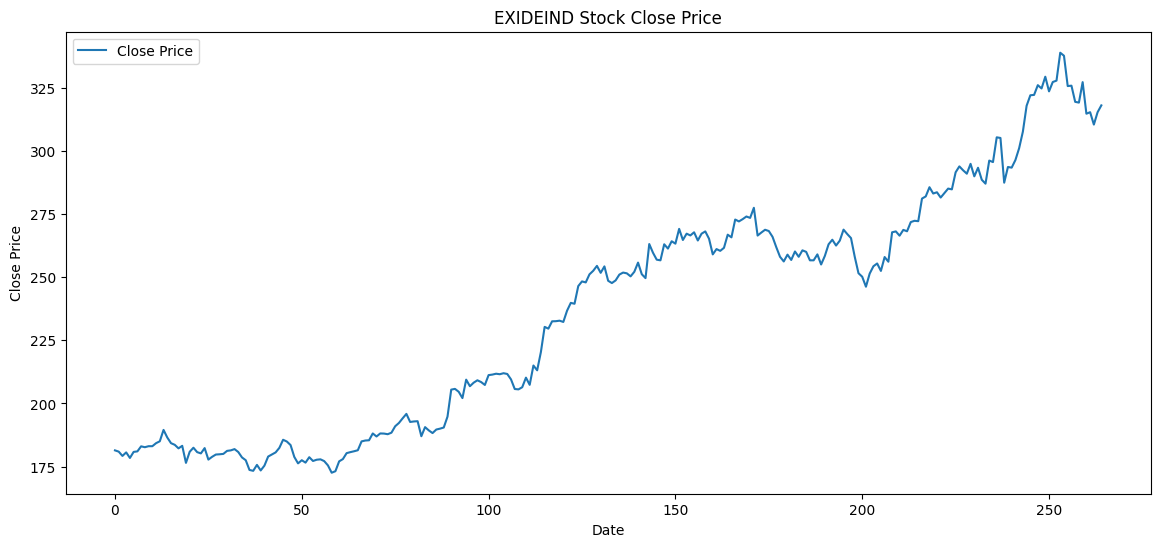

In [184]:
# Plot the closing prices
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('EXIDEIND Stock Close Price')
plt.legend()
plt.show()

**Technical Indicators- RSI,MACD,Bollinger Bands**

In [193]:
import pandas as pd

# Adding technical indicators
def add_technical_indicators(data):
    # Ensure data is sorted by date
    data = data.sort_index()

    # RSI (Relative Strength Index)
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    RS = gain / loss
    data['RSI'] = 100 - (100 / (1 + RS))

    # MACD (Moving Average Convergence Divergence)
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Bollinger Bands
    data['20_MA'] = data['Close'].rolling(window=20).mean()
    data['20_SD'] = data['Close'].rolling(window=20).std()
    data['Upper_Band'] = data['20_MA'] + (2 * data['20_SD'])
    data['Lower_Band'] = data['20_MA'] - (2 * data['20_SD'])

    # Additional Indicators
    # RSI interpretation
    data['RSI_Text'] = ''
    data.loc[data['RSI'] < 30, 'RSI_Text'] = 'Readings below 30 generally indicate that the stock is oversold.'
    data.loc[data['RSI'] > 70, 'RSI_Text'] = 'Readings above 70 generally indicate that the stock is overbought.'

    # Bollinger Bands indication
    data['BB_Text'] = ''
    data.loc[data['Close'] > data['Upper_Band'], 'BB_Text'] = 'Price is above upper Bollinger Band, potentially overbought.'
    data.loc[data['Close'] < data['Lower_Band'], 'BB_Text'] = 'Price is below lower Bollinger Band, potentially oversold.'

    # Volume
    data['Volume_MA'] = data['Volume'].rolling(window=20).mean()

    return data

# Assuming 'df' is your dataframe
df = add_technical_indicators(df)
df.head(10)



,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA12,EMA26,MACD,Signal_Line,20_MA,20_SD,Upper_Band,Lower_Band,RSI_Text,BB_Text,Volume_MA,RSI14
0,2023-01-02,181.000000,181.750000,179.649994,181.399994,179.946472,1333139,NaN,181.399994,181.399994,0.000000,0.000000,NaN,NaN,NaN,NaN,,,NaN,NaN
1,2023-01-03,182.000000,183.000000,179.500000,180.899994,179.450470,1729484,NaN,181.323071,181.362957,-0.039886,-0.007977,NaN,NaN,NaN,NaN,,,NaN,NaN
2,2023-01-04,180.649994,181.050003,176.899994,179.199997,177.764099,1956913,NaN,180.996444,181.202738,-0.206294,-0.047640,NaN,NaN,NaN,NaN,,,NaN,NaN
3,2023-01-05,179.250000,181.550003,178.550003,180.600006,179.152893,1362043,NaN,180.935454,181.158091,-0.222637,-0.082640,NaN,NaN,NaN,NaN,,,NaN,NaN
4,2023-01-06,180.500000,181.600006,177.750000,178.399994,176.970505,1453876,NaN,180.545383,180.953787,-0.408404,-0.147793,NaN,NaN,NaN,NaN,,,NaN,NaN
5,2023-01-09,179.000000,181.350006,178.800003,180.800003,179.351288,1205955,NaN,180.584555,180.942396,-0.357841,-0.189802,NaN,NaN,NaN,NaN,,,NaN,NaN
6,2023-01-10,182.199997,183.100006,179.100006,181.000000,179.549683,2079610,NaN,180.648470,180.946663,-0.298193,-0.211480,NaN,NaN,NaN,NaN,,,NaN,NaN
7,2023-01-11,181.100006,184.300003,181.100006,183.000000,181.533646,1978023,NaN,181.010244,181.098762,-0.088518,-0.186888,NaN,NaN,NaN,NaN,,,NaN,NaN
8,2023-01-12,184.100006,185.500000,181.699997,182.649994,181.186447,2496914,NaN,181.262513,181.213668,0.048845,-0.139741,NaN,NaN,NaN,NaN,,,NaN,NaN
9,2023-01-13,182.800003,184.050003,181.550003,183.050003,181.583252,1124171,NaN,181.537511,181.349693,0.187819,-0.074229,NaN,NaN,NaN,NaN,,,NaN,NaN



**Relative Strength Index (RSI) Indicator **

         Date       Close  RSI14
0  2023-01-02  181.399994    NaN
1  2023-01-03  180.899994    NaN
2  2023-01-04  179.199997    NaN
3  2023-01-05  180.600006    NaN
4  2023-01-06  178.399994    NaN
5  2023-01-09  180.800003    NaN
6  2023-01-10  181.000000    NaN
7  2023-01-11  183.000000    NaN
8  2023-01-12  182.649994    NaN
9  2023-01-13  183.050003    NaN
10 2023-01-16  183.050003    NaN
11 2023-01-17  184.250000    NaN
12 2023-01-18  185.000000    NaN
13 2023-01-19  189.500000    NaN
14 2023-01-20  186.500000    NaN
15 2023-01-23  184.250000    NaN
16 2023-01-24  183.600006    NaN
17 2023-01-25  182.199997    NaN
18 2023-01-27  183.199997    NaN
19 2023-01-30  176.449997    NaN


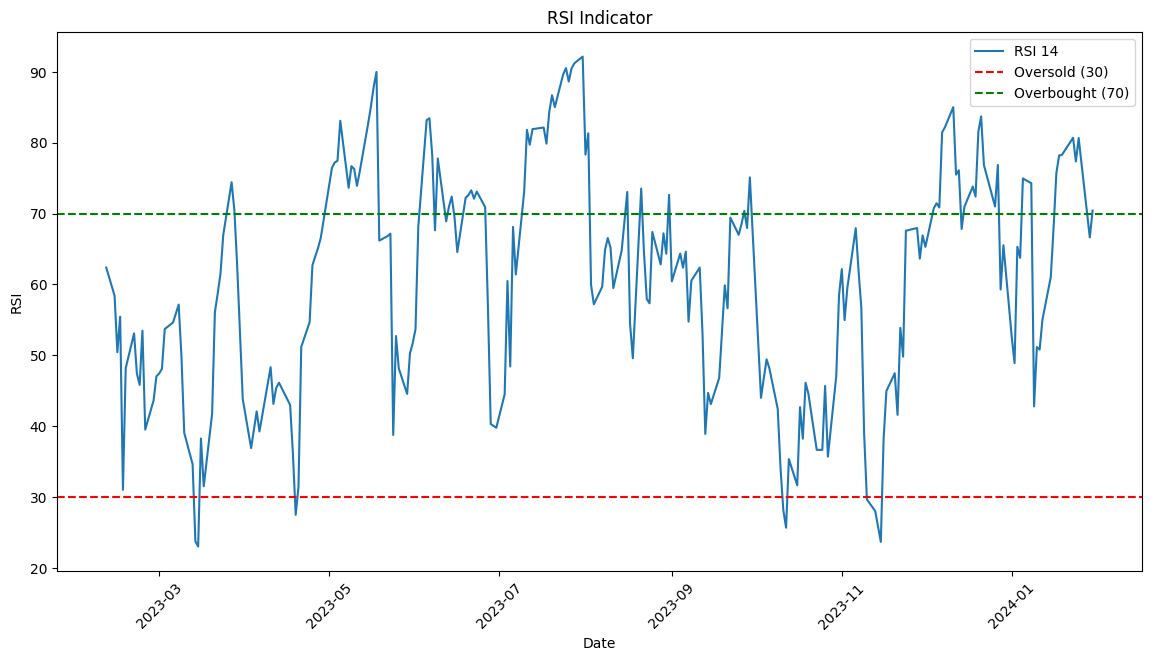

In [183]:
#RSI-indicator

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


def EMA(Close_arr, n):
    a = 2 / (n + 1)
    EMA_n = np.zeros(len(Close_arr))
    EMA_n[:n] = np.nan

    # Initialize the first EMA value
    EMA_n[n] = np.mean(Close_arr[:n])

    # Calculate EMA for the rest of the values
    for i in range(n + 1, len(Close_arr)):
        EMA_n[i] = (Close_arr[i] - EMA_n[i - 1]) * a + EMA_n[i - 1]

    return EMA_n

def gains(Close_arr):
    gain_arr = np.diff(Close_arr)
    gain_arr[gain_arr < 0] = 0
    return gain_arr

def losses(Close_arr):
    loss_arr = np.diff(Close_arr)
    loss_arr[loss_arr > 0] = 0
    return np.abs(loss_arr)

def RSI(Close_arr, n=14):
    gain_arr = gains(Close_arr)
    loss_arr = losses(Close_arr)

    EMA_u = EMA(gain_arr, n)
    EMA_d = EMA(loss_arr, n)

    EMA_diff = EMA_u / EMA_d

    RSI_n = 100 - (100 / (1 + EMA_diff))
    RSI_n = np.concatenate((np.full(n, np.nan), RSI_n))  # Align lengths by padding initial values with NaN
    return RSI_n

# Use the closing prices to calculate RSI
Close = df['Close'].values
RSI14 = RSI(Close, n=14)

# Ensure the lengths match by trimming the RSI array if necessary
RSI14 = RSI14[:len(df)]

# Adding the RSI to the dataframe
df['RSI14'] = RSI14

print(df[['Date', 'Close', 'RSI14']].head(20))

# Save the dataframe with RSI to a new CSV file
df.to_csv('/content/EXIDEIND_data.csv', index=False)

# Plot the RSI
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['RSI14'], label='RSI 14')
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [186]:
# Use the 'Close' prices for prediction
data = df['Close'].values.reshape(-1, 1)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create a function to prepare the data for LSTM model
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Based on common practices for stock prediction
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Check the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

# Ensure the datasets are not empty and have the expected dimensions
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("Not enough data to create the required training and testing datasets. Please check the time_step value or the size of your dataset.")

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


X_train shape: (124, 60)
Y_train shape: (124,)
X_test shape: (19, 60)
Y_test shape: (19,)




**LATM-Long Short Term Memory Network**


In [187]:
# Create and fit the advanced LSTM network
model = Sequential()

# Add multiple LSTM layers with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=64, epochs=100)

# Predict the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

Epoch 1/100
2/2 [==============================] - 9s 183ms/step - loss: 0.1137
Epoch 2/100
2/2 [==============================] - 0s 157ms/step - loss: 0.0349
Epoch 3/100
2/2 [==============================] - 0s 154ms/step - loss: 0.0213
Epoch 4/100
2/2 [==============================] - 0s 189ms/step - loss: 0.0205
Epoch 5/100
2/2 [==============================] - 0s 152ms/step - loss: 0.0103
Epoch 6/100
2/2 [==============================] - 0s 161ms/step - loss: 0.0178
Epoch 7/100
2/2 [==============================] - 0s 190ms/step - loss: 0.0168
Epoch 8/100
2/2 [==============================] - 0s 156ms/step - loss: 0.0096
Epoch 9/100
2/2 [==============================] - 0s 155ms/step - loss: 0.0084
Epoch 10/100
2/2 [==============================] - 0s 182ms/step - loss: 0.0097
Epoch 11/100
2/2 [==============================] - 0s 154ms/step - loss: 0.0080
Epoch 12/100
2/2 [==============================] - 0s 187ms/step - loss: 0.0058
Epoch 13/100
2/2 [===================

**Predicted Result**

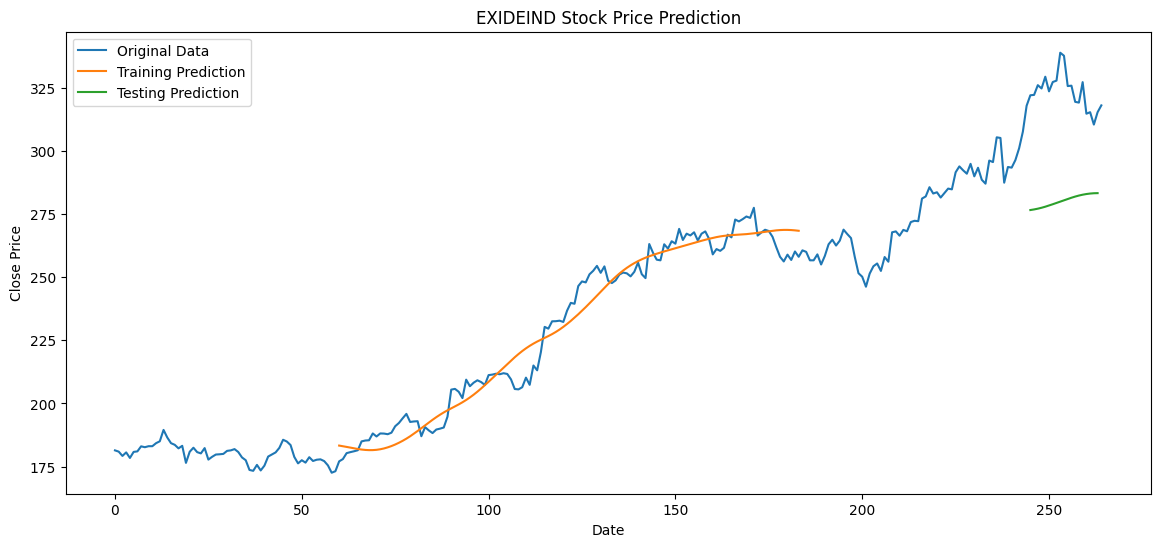

In [189]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, data, label='Original Data')
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(df.index, train_plot, label='Training Prediction')
plt.plot(df.index, test_plot, label='Testing Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('EXIDEIND Stock Price Prediction')
plt.legend()
plt.show()

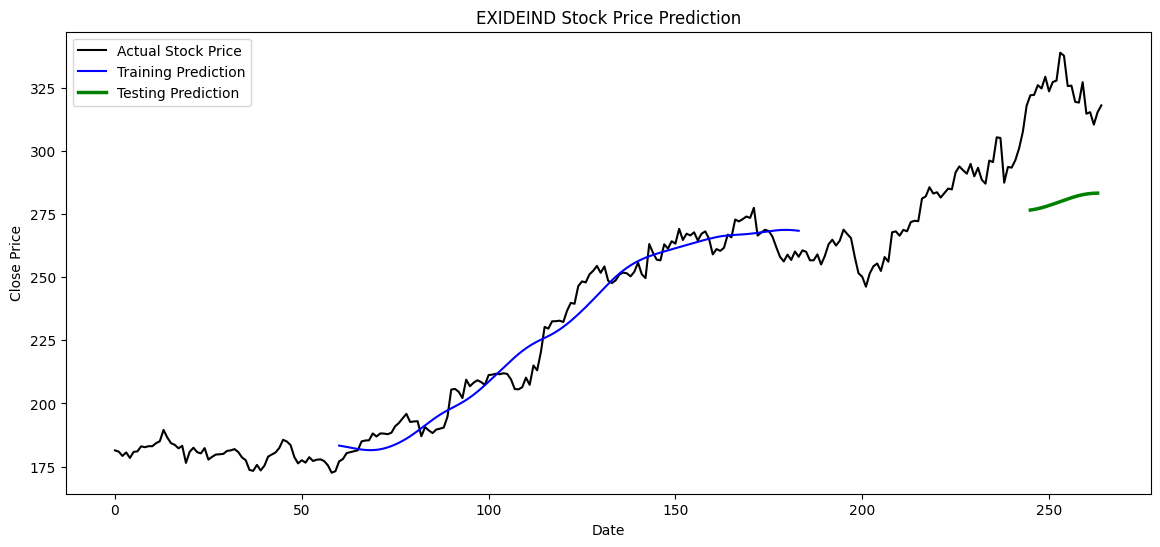

In [191]:


# Plot the results
plt.figure(figsize=(14, 6))

# Plot the actual stock price
plt.plot(df.index, data, label='Actual Stock Price', color='black')

# Prepare training prediction plot
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Prepare testing prediction plot
test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

# Plot training predictions
plt.plot(df.index, train_plot, label='Training Prediction', color='blue')

# Plot testing predictions with a prominent green color
plt.plot(df.index, test_plot, label='Testing Prediction', color='green', linewidth=2.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('EXIDEIND Stock Price Prediction')

# Add legend
plt.legend()

# Show the plot
plt.show()
